# Step 01 - Import Libraries & Data from Task 4.9

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os

In [2]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# import new customer dataframe
path = r'C:\Users\jakey\OneDrive\Documents\Data Analytics\CareerFoundry\Data Immersion\Achievement 4\Instacart Basket Analysis'

In [4]:
df_part1 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'task410dataprep30.csv'), index_col = False)

In [5]:
# check the df
df_part1.head()

Unnamed: 0  user_id  gender       state   age date_joined  dependants  \
0     3032160    36471  Female    Colorado  54.0   4/21/2017           3   
1     2888122   132240    Male  Washington  80.0   4/15/2017           3   
2    17974302    32132    Male      Alaska  32.0  10/20/2018           1   
3    29847593    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    23427530    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  ...     price_range_loc  \
0           married  119905        5428  ...   Mid-range product   
1           married   37128       16254  ...   Low-range product   
2           married  132296       44100  ...   Low-range product   
3           married   92143       38400  ...   Low-range product   
4  divorced/widowed  106452       13877  ...  High-range product   

      busiest_day     busiest_days  busiest_period_of_day  max_order  \
0  Regularly busy   Regularly Busy            Most orders         66   
1  Regularly busy  Least Busy Days         Average orders         30   
2  Regularly busy  Least Busy Days            Most orders         20   
3  Regularly busy   Regularly Busy            Most orders         31   
4  Regularly busy   Regularly Busy         Average orders         23   

       loyalty_flag  avg_price  spender_flag  order_frequency_flag  regularity  
0    Loyal customer          7   Low spender    Frequent customer.         4.0  
1  Regular customer          6   Low spender    Frequent customer.        10.0  
2  Regular customer        153  High spender     Regular customer.        15.0  
3  Regular customer          7   Low spender    Frequent customer.         9.0  
4  Regular customer          7   Low spender     Regular customer.        12.0  

[5 rows x 32 columns]

In [6]:
df_part1.tail()

Unnamed: 0  user_id  gender           state   age date_joined  \
9721807    13657141   103960    Male        Nebraska  59.0   5/15/2018   
9721808    25529840    33905    Male  South Carolina  26.0   7/25/2019   
9721809    14244372    22097  Female        Illinois  62.0    6/5/2018   
9721810    19152417    65153  Female      New Mexico  55.0   12/3/2018   
9721811    24482983   106570    Male        Oklahoma  48.0   6/16/2019   

         dependants marital_status  income  product_id  ...  \
9721807           3        married   94531       38400  ...   
9721808           3        married   67135       42479  ...   
9721809           3        married   82487       36011  ...   
9721810           0         single   29882       47766  ...   
9721811           3        married  152778       46886  ...   

           price_range_loc     busiest_day     busiest_days  \
9721807  Low-range product  Regularly busy   Regularly Busy   
9721808  Mid-range product     Busiest day     Busiest Days   
9721809  Low-range product     Busiest day     Busiest Days   
9721810  Mid-range product  Regularly busy     Busiest Days   
9721811  Mid-range product      Least busy  Least Busy Days   

         busiest_period_of_day  max_order      loyalty_flag  avg_price  \
9721807         Average orders         31  Regular customer          7   
9721808         Average orders         10      New customer          7   
9721809            Most orders         76    Loyal customer          8   
9721810            Most orders         29  Regular customer          6   
9721811            Most orders         36  Regular customer          8   

         spender_flag  order_frequency_flag  regularity  
9721807   Low spender    Frequent customer.         7.0  
9721808   Low spender     Regular customer.        17.0  
9721809   Low spender    Frequent customer.         4.0  
9721810   Low spender    Frequent customer.         8.0  
9721811   Low spender    Frequent customer.         8.0  

[5 rows x 32 columns]

In [7]:
df_part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721812 entries, 0 to 9721811
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   user_id                 int64  
 2   gender                  object 
 3   state                   object 
 4   age                     float64
 5   date_joined             object 
 6   dependants              int64  
 7   marital_status          object 
 8   income                  int64  
 9   product_id              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  int64  
 14  order_id                int64  
 15  order_number            int64  
 16  order_day_of_the_week   int64  
 17  order_hour_of_day       int64  
 18  days_since_prior_order  float64
 19  new_customer            bool   
 20  add_to_cart_order       int64  
 21  reordered               int64  

# Step 02 - Consider PII

# two columns should not be included, 'first_name' and 'surname' for privacy reasons. remove columns. I had removed these two columns in the data prep.

# Step 03 - Creating a new column for Region

In [9]:
# creating regions
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# create a new column with elif function
df_part1.loc[df_part1['state'].isin(northeast), 'region'] = 'northeast'

In [11]:
df_part1.loc[df_part1['state'].isin(midwest), 'region'] = 'midwest'

In [12]:
df_part1.loc[df_part1['state'].isin(south), 'region'] = 'south'

In [13]:
df_part1.loc[df_part1['state'].isin(west), 'region'] = 'west'

In [14]:
# check the df
df_part1.head()

Unnamed: 0  user_id  gender       state   age date_joined  dependants  \
0     3032160    36471  Female    Colorado  54.0   4/21/2017           3   
1     2888122   132240    Male  Washington  80.0   4/15/2017           3   
2    17974302    32132    Male      Alaska  32.0  10/20/2018           1   
3    29847593    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    23427530    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  ...     busiest_day     busiest_days  \
0           married  119905        5428  ...  Regularly busy   Regularly Busy   
1           married   37128       16254  ...  Regularly busy  Least Busy Days   
2           married  132296       44100  ...  Regularly busy  Least Busy Days   
3           married   92143       38400  ...  Regularly busy   Regularly Busy   
4  divorced/widowed  106452       13877  ...  Regularly busy   Regularly Busy   

   busiest_period_of_day  max_order      loyalty_flag  avg_price  \
0            Most orders         66    Loyal customer          7   
1         Average orders         30  Regular customer          6   
2            Most orders         20  Regular customer        153   
3            Most orders         31  Regular customer          7   
4         Average orders         23  Regular customer          7   

   spender_flag  order_frequency_flag  regularity  region  
0   Low spender    Frequent customer.         4.0    west  
1   Low spender    Frequent customer.        10.0    west  
2  High spender     Regular customer.        15.0    west  
3   Low spender    Frequent customer.         9.0   south  
4   Low spender     Regular customer.        12.0   south  

[5 rows x 33 columns]

In [15]:
# ensure all of records were assigned a region
df_part1['region'].value_counts(dropna=False)

south        3236692
west         2490617
midwest      2278468
northeast    1716035
Name: region, dtype: int64

In [16]:
# transform 'prices' to a number
df_part1['prices'] = df_part1['prices'].astype('float16')

In [17]:
df_part1.info('prices')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9721812 entries, 0 to 9721811
Data columns (total 33 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   user_id                 int64  
 2   gender                  object 
 3   state                   object 
 4   age                     float64
 5   date_joined             object 
 6   dependants              int64  
 7   marital_status          object 
 8   income                  int64  
 9   product_id              int64  
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  prices                  float16
 14  order_id                int64  
 15  order_number            int64  
 16  order_day_of_the_week   int64  
 17  order_hour_of_day       int64  
 18  days_since_prior_order  float64
 19  new_customer            bool   
 20  add_to_cart_order       int64  
 21  reordered               int64  

In [18]:
# checking spending habits by region
df_part1.groupby('region').agg({'prices':[mean]})

prices
            mean
region          
midwest      NaN
northeast    NaN
south        NaN
west         NaN

In [19]:
# Check the values of prices
print(df_part1['prices'])

0          14.0
1           4.0
2           2.0
3           3.0
4          21.0
           ... 
9721807     3.0
9721808    13.0
9721809     3.0
9721810     6.0
9721811    13.0
Name: prices, Length: 9721812, dtype: float16


In [20]:
# Check the value count of prices
df_part1['prices'].value_counts(dropna=False)

6.0        838896
4.0        816412
1.0        773323
3.0        729305
5.0        720542
7.0        710620
8.0        700243
12.0       654532
2.0        650257
11.0       620762
14.0       620242
9.0        589633
10.0       589563
13.0       553319
15.0        36599
23.0        17609
21.0        16658
19.0        16267
18.0        15877
24.0        12602
22.0        10950
16.0         8462
20.0         7594
17.0         5773
25.0         4167
14896.0      1392
inf           213
Name: prices, dtype: int64

# Step 04 - Excluding Low Activity Spenders

In [22]:
# creating a variable that adds up number of user_id 
df_part1['total_orders']=df_part1.groupby(['user_id']).user_id.transform('count')

In [23]:
# creating a flag for users with less than 5 total orders
results=[]
for total in df_part1['total_orders']:
    if total < 5:
        results.append('Low Activity')
    else:
        results.append('Regular Activity')

In [24]:
# check df
df_part1.head()

Unnamed: 0  user_id  gender       state   age date_joined  dependants  \
0     3032160    36471  Female    Colorado  54.0   4/21/2017           3   
1     2888122   132240    Male  Washington  80.0   4/15/2017           3   
2    17974302    32132    Male      Alaska  32.0  10/20/2018           1   
3    29847593    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    23427530    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  ...     busiest_days  \
0           married  119905        5428  ...   Regularly Busy   
1           married   37128       16254  ...  Least Busy Days   
2           married  132296       44100  ...  Least Busy Days   
3           married   92143       38400  ...   Regularly Busy   
4  divorced/widowed  106452       13877  ...   Regularly Busy   

   busiest_period_of_day  max_order      loyalty_flag  avg_price  \
0            Most orders         66    Loyal customer          7   
1         Average orders         30  Regular customer          6   
2            Most orders         20  Regular customer        153   
3            Most orders         31  Regular customer          7   
4         Average orders         23  Regular customer          7   

   spender_flag  order_frequency_flag  regularity  region  total_orders  
0   Low spender    Frequent customer.         4.0    west           206  
1   Low spender    Frequent customer.        10.0    west            91  
2  High spender     Regular customer.        15.0    west            64  
3   Low spender    Frequent customer.         9.0   south            69  
4   Low spender     Regular customer.        12.0   south           124  

[5 rows x 34 columns]

In [25]:
# creating column in df
df_part1['activity_flag'] = results

In [26]:
# check df
df_part1.head()

Unnamed: 0  user_id  gender       state   age date_joined  dependants  \
0     3032160    36471  Female    Colorado  54.0   4/21/2017           3   
1     2888122   132240    Male  Washington  80.0   4/15/2017           3   
2    17974302    32132    Male      Alaska  32.0  10/20/2018           1   
3    29847593    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    23427530    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  ... busiest_period_of_day  max_order  \
0           married  119905        5428  ...           Most orders         66   
1           married   37128       16254  ...        Average orders         30   
2           married  132296       44100  ...           Most orders         20   
3           married   92143       38400  ...           Most orders         31   
4  divorced/widowed  106452       13877  ...        Average orders         23   

       loyalty_flag  avg_price  spender_flag  order_frequency_flag  \
0    Loyal customer          7   Low spender    Frequent customer.   
1  Regular customer          6   Low spender    Frequent customer.   
2  Regular customer        153  High spender     Regular customer.   
3  Regular customer          7   Low spender    Frequent customer.   
4  Regular customer          7   Low spender     Regular customer.   

   regularity  region  total_orders     activity_flag  
0         4.0    west           206  Regular Activity  
1        10.0    west            91  Regular Activity  
2        15.0    west            64  Regular Activity  
3         9.0   south            69  Regular Activity  
4        12.0   south           124  Regular Activity  

[5 rows x 35 columns]

In [27]:
# I noticed that we have a column called Unnamed: 0, we can remove this.
df_part1 = df_part1.drop(columns = ['Unnamed: 0'])

In [28]:
df_part1.head()

user_id  gender       state   age date_joined  dependants  \
0    36471  Female    Colorado  54.0   4/21/2017           3   
1   132240    Male  Washington  80.0   4/15/2017           3   
2    32132    Male      Alaska  32.0  10/20/2018           1   
3    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  \
0           married  119905        5428   
1           married   37128       16254   
2           married  132296       44100   
3           married   92143       38400   
4  divorced/widowed  106452       13877   

                                        product_name  ...  \
0                                            1 Liter  ...   
1        ZBar Organic Chocolate Brownie Energy Snack  ...   
2  Drumstick Variety Pack Frozen Dairy Dessert Cones  ...   
3                Asparation/Broccolini/Baby Broccoli  ...   
4                                      Smoked Salmon  ...   

   busiest_period_of_day  max_order      loyalty_flag  avg_price  \
0            Most orders         66    Loyal customer          7   
1         Average orders         30  Regular customer          6   
2            Most orders         20  Regular customer        153   
3            Most orders         31  Regular customer          7   
4         Average orders         23  Regular customer          7   

   spender_flag  order_frequency_flag  regularity  region  total_orders  \
0   Low spender    Frequent customer.         4.0    west           206   
1   Low spender    Frequent customer.        10.0    west            91   
2  High spender     Regular customer.        15.0    west            64   
3   Low spender    Frequent customer.         9.0   south            69   
4   Low spender     Regular customer.        12.0   south           124   

      activity_flag  
0  Regular Activity  
1  Regular Activity  
2  Regular Activity  
3  Regular Activity  
4  Regular Activity  

[5 rows x 34 columns]

In [29]:
# check the data
df_part1['activity_flag'].value_counts(dropna=False)

Regular Activity    9682517
Low Activity          39295
Name: activity_flag, dtype: int64

In [30]:
# create two subsets - one for low activity and one for normal activity
df_low_activity = df_part1[df_part1['activity_flag']=='Low Activity']

In [31]:
df_low_activity.head()

user_id  gender           state   age date_joined  dependants  \
365    64699  Female        Oklahoma  44.0   7/11/2019           3   
424   196486  Female   Massachusetts  70.0   8/31/2019           1   
501    66951    Male    Pennsylvania  45.0    7/9/2018           0   
519    43340    Male  South Carolina  22.0    1/6/2018           2   
607   202741    Male            Iowa  35.0   8/29/2019           2   

    marital_status  income  product_id  \
365        married  133369       30411   
424        married   40321        5025   
501         single   47031       14233   
519        married   29229       16953   
607        married   42374       26405   

                                          product_name  ...  \
365  Organic Lemon Flavor Recharge Thirst Quencher ...  ...   
424                                       Green Onions  ...   
501                             Natural Artesian Water  ...   
519                               Creamy Peanut Butter  ...   
607                   XL Pick-A-Size Paper Towel Rolls  ...   

     busiest_period_of_day  max_order  loyalty_flag  avg_price  spender_flag  \
365            Most orders          3  New customer          8   Low spender   
424         Average orders          4  New customer          6   Low spender   
501            Most orders          3  New customer          3   Low spender   
519         Average orders          3  New customer          6   Low spender   
607         Average orders          7  New customer          1   Low spender   

       order_frequency_flag  regularity     region  total_orders  \
365      Frequent customer.         2.0      south             4   
424  Non-frequent customer.        28.0  northeast             3   
501      Frequent customer.         3.5  northeast             1   
519       Regular customer.        17.0      south             4   
607  Non-frequent customer.        20.5    midwest             3   

     activity_flag  
365   Low Activity  
424   Low Activity  
501   Low Activity  
519   Low Activity  
607   Low Activity  

[5 rows x 34 columns]

In [32]:
df_regular_activity = df_part1[df_part1['activity_flag']=='Regular Activity']

In [33]:
df_regular_activity.head()

user_id  gender       state   age date_joined  dependants  \
0    36471  Female    Colorado  54.0   4/21/2017           3   
1   132240    Male  Washington  80.0   4/15/2017           3   
2    32132    Male      Alaska  32.0  10/20/2018           1   
3    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  \
0           married  119905        5428   
1           married   37128       16254   
2           married  132296       44100   
3           married   92143       38400   
4  divorced/widowed  106452       13877   

                                        product_name  ...  \
0                                            1 Liter  ...   
1        ZBar Organic Chocolate Brownie Energy Snack  ...   
2  Drumstick Variety Pack Frozen Dairy Dessert Cones  ...   
3                Asparation/Broccolini/Baby Broccoli  ...   
4                                      Smoked Salmon  ...   

   busiest_period_of_day  max_order      loyalty_flag  avg_price  \
0            Most orders         66    Loyal customer          7   
1         Average orders         30  Regular customer          6   
2            Most orders         20  Regular customer        153   
3            Most orders         31  Regular customer          7   
4         Average orders         23  Regular customer          7   

   spender_flag  order_frequency_flag  regularity  region  total_orders  \
0   Low spender    Frequent customer.         4.0    west           206   
1   Low spender    Frequent customer.        10.0    west            91   
2  High spender     Regular customer.        15.0    west            64   
3   Low spender    Frequent customer.         9.0   south            69   
4   Low spender     Regular customer.        12.0   south           124   

      activity_flag  
0  Regular Activity  
1  Regular Activity  
2  Regular Activity  
3  Regular Activity  
4  Regular Activity  

[5 rows x 34 columns]

In [34]:
# Export the DFs
df_regular_activity.to_csv(os.path.join(path, '02 Data','Prepared Data','task410pt1regular.csv'))

In [35]:
# check the value count for 'total_orders'
df_part1['total_orders'].value_counts().sort_index(ascending=False)

1100     1100
1053     1053
930       930
890       890
879       879
        ...  
5       24715
4       18516
3       12342
2        6312
1        2125
Name: total_orders, Length: 616, dtype: int64

In [36]:
df_regular_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9682517 entries, 0 to 9721811
Data columns (total 34 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   gender                  object 
 2   state                   object 
 3   age                     float64
 4   date_joined             object 
 5   dependants              int64  
 6   marital_status          object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float16
 13  order_id                int64  
 14  order_number            int64  
 15  order_day_of_the_week   int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  new_customer            bool   
 19  add_to_cart_order       int64  
 20  reordered               int64  
 21  price_range_loc         object 

In [37]:
# Export the DFs
df_low_activity.to_csv(os.path.join(path, '02 Data','Prepared Data','task410pt1low.csv'))

# Step 05 - Creating Customer Profiles

In [40]:
# Age Profile Flag - dividing the population into four categories (18-30, 31-50, 51-65, 65+)
df_regular_activity.loc[df_regular_activity['age'] <= 30, 'age_group'] = 'Young Adult'

In [39]:
# Age 31-50
df_regular_activity.loc[(df_regular_activity['age'] > 30) & (df_regular_activity['age'] <= 50), 'age_group'] = 'Adult'

In [41]:
# Age 51-65
df_regular_activity.loc[(df_regular_activity['age'] > 50) & (df_regular_activity['age'] <= 65), 'age_group'] = 'Empty Nesters'

In [42]:
# Age 65+
df_regular_activity.loc[df_regular_activity['age'] > 65, 'age_group'] = 'Seniors'

In [43]:
df_regular_activity['age_group'].value_counts()

Adult            3035514
Seniors          2415982
Empty Nesters    2258714
Young Adult      1972307
Name: age_group, dtype: int64

In [44]:
# Income Profile Flag - segmenting the population into lower, middle and upper income according to Pew Research
df_regular_activity.loc[df_regular_activity['income'] <= 52000, 'income_class'] = 'Lower'

In [45]:
df_regular_activity.loc[(df_regular_activity['income'] > 52000) & (df_regular_activity['income'] <= 156000), 'income_class'] = 'Middle'

In [46]:
df_regular_activity.loc[df_regular_activity['income'] > 156000, 'income_class'] = 'Upper'

In [47]:
df_regular_activity['income_class'].value_counts()

Middle    7647569
Lower     1151584
Upper      883364
Name: income_class, dtype: int64

In [48]:
df_regular_activity.head()

user_id  gender       state   age date_joined  dependants  \
0    36471  Female    Colorado  54.0   4/21/2017           3   
1   132240    Male  Washington  80.0   4/15/2017           3   
2    32132    Male      Alaska  32.0  10/20/2018           1   
3    14668    Male    Oklahoma  60.0  12/31/2019           2   
4    91997  Female       Texas  78.0    5/8/2019           0   

     marital_status  income  product_id  \
0           married  119905        5428   
1           married   37128       16254   
2           married  132296       44100   
3           married   92143       38400   
4  divorced/widowed  106452       13877   

                                        product_name  ...      loyalty_flag  \
0                                            1 Liter  ...    Loyal customer   
1        ZBar Organic Chocolate Brownie Energy Snack  ...  Regular customer   
2  Drumstick Variety Pack Frozen Dairy Dessert Cones  ...  Regular customer   
3                Asparation/Broccolini/Baby Broccoli  ...  Regular customer   
4                                      Smoked Salmon  ...  Regular customer   

   avg_price  spender_flag  order_frequency_flag  regularity  region  \
0          7   Low spender    Frequent customer.         4.0    west   
1          6   Low spender    Frequent customer.        10.0    west   
2        153  High spender     Regular customer.        15.0    west   
3          7   Low spender    Frequent customer.         9.0   south   
4          7   Low spender     Regular customer.        12.0   south   

   total_orders     activity_flag      age_group  income_class  
0           206  Regular Activity  Empty Nesters        Middle  
1            91  Regular Activity        Seniors         Lower  
2            64  Regular Activity          Adult        Middle  
3            69  Regular Activity  Empty Nesters        Middle  
4           124  Regular Activity        Seniors        Middle  

[5 rows x 36 columns]

In [49]:
df_regular_activity.tail()

user_id  gender           state   age date_joined  dependants  \
9721807   103960    Male        Nebraska  59.0   5/15/2018           3   
9721808    33905    Male  South Carolina  26.0   7/25/2019           3   
9721809    22097  Female        Illinois  62.0    6/5/2018           3   
9721810    65153  Female      New Mexico  55.0   12/3/2018           0   
9721811   106570    Male        Oklahoma  48.0   6/16/2019           3   

        marital_status  income  product_id  \
9721807        married   94531       38400   
9721808        married   67135       42479   
9721809        married   82487       36011   
9721810         single   29882       47766   
9721811        married  152778       46886   

                                product_name  ...      loyalty_flag  \
9721807  Asparation/Broccolini/Baby Broccoli  ...  Regular customer   
9721808                  Almond Milk Ricotta  ...      New customer   
9721809                Organic Fat Free Milk  ...    Loyal customer   
9721810                      Organic Avocado  ...  Regular customer   
9721811                    Raspberry Yoghurt  ...  Regular customer   

         avg_price  spender_flag  order_frequency_flag  regularity   region  \
9721807          7   Low spender    Frequent customer.         7.0  midwest   
9721808          7   Low spender     Regular customer.        17.0    south   
9721809          8   Low spender    Frequent customer.         4.0  midwest   
9721810          6   Low spender    Frequent customer.         8.0     west   
9721811          8   Low spender    Frequent customer.         8.0    south   

         total_orders     activity_flag      age_group  income_class  
9721807            80  Regular Activity  Empty Nesters        Middle  
9721808            26  Regular Activity    Young Adult        Middle  
9721809           265  Regular Activity  Empty Nesters        Middle  
9721810            44  Regular Activity  Empty Nesters         Lower  
9721811           205  Regular Activity          Adult        Middle  

[5 rows x 36 columns]

In [50]:
df_regular_activity['income'].describe()

count    9.682517e+06
mean     9.951239e+04
std      4.307060e+04
min      2.590300e+04
25%      6.710200e+04
50%      9.666700e+04
75%      1.279630e+05
max      5.939010e+05
Name: income, dtype: float64

In [51]:
# check the department_id
df_regular_activity['department_id'].value_counts()

4     2835772
16    1616200
19     862267
7      799647
1      667637
13     559798
3      349981
15     319088
20     314416
9      258850
17     220013
12     211630
14     210167
11     133133
18     127083
6       80539
5       45480
8       29195
21      20540
2       10649
10      10432
Name: department_id, dtype: int64

In [52]:
df_regular_activity['dependants'].value_counts()

3    2431146
0    2419343
2    2417556
1    2414472
Name: dependants, dtype: int64

# Step 06 - Visualizations for Profiles

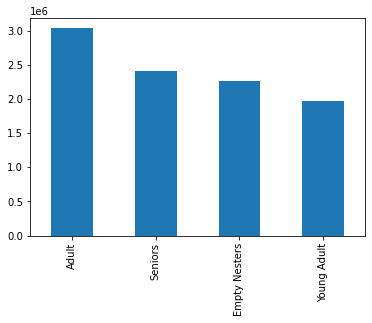

In [60]:
age_group_bar = df_regular_activity['age_group'].value_counts().plot.bar()

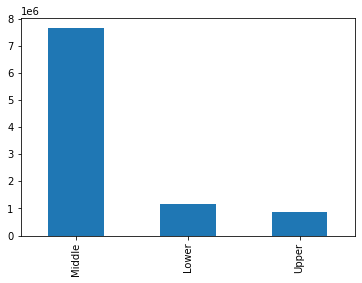

In [61]:
income_class_bar = df_regular_activity['income_class'].value_counts().plot.bar()

In [62]:
# Export the bar graphs
age_group_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [64]:
# Export the bar graphs
income_class_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_class.png'))

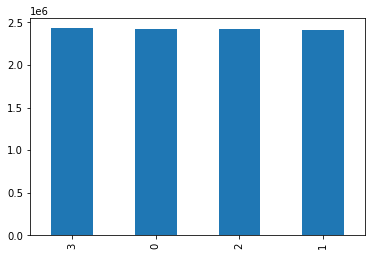

In [65]:
# Create a Dependants Graph
dependants_bar = df_regular_activity['dependants'].value_counts().plot.bar()

In [66]:
# Export the bar graphs
dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dependants.png'))

# Step 07 - Aggregates for Customer Profiles

In [67]:
# Aggregate Max, Mean & Min for Dependants vs Total Orders
df_regular_activity.groupby('dependants').agg({'total_orders': ['mean', 'min', 'max']})

total_orders          
                   mean min   max
dependants                       
0            128.085162   5  1100
1            128.097000   5   879
2            126.677994   5  1053
3            127.861473   5   833

In [68]:
# Aggregate Max, Mean & Min for Age vs Frequency
df_regular_activity.groupby('age_group').agg({'regularity': ['mean', 'min', 'max']})

regularity           
                    mean  min   max
age_group                          
Adult          10.356113  0.0  30.0
Empty Nesters  10.398240  0.0  30.0
Seniors        10.326485  0.0  30.0
Young Adult    10.376096  0.0  30.0

In [69]:
# Aggregate Max, Mean & Min for Income Class vs Frequency
df_regular_activity.groupby('income_class').agg({'regularity': ['mean', 'min', 'max']})

regularity           
                   mean  min   max
income_class                      
Lower         10.993425  0.0  30.0
Middle        10.294379  0.0  30.0
Upper         10.131045  0.0  30.0

In [70]:
# Aggregate Max, Mean & Min for Age Group vs Total Orders
df_regular_activity.groupby('age_group').agg({'total_orders': ['mean', 'min', 'max']})

total_orders          
                      mean min   max
age_group                           
Adult           129.095565   5   879
Empty Nesters   127.423923   5  1100
Seniors         126.589744   5  1053
Young Adult     127.133086   5   756

In [71]:
# Aggregate Max, Mean & Min for Income Class vs Total Orders
df_regular_activity.groupby('income_class').agg({'total_orders': ['mean', 'min', 'max']})

total_orders          
                     mean min   max
income_class                       
Lower          107.798667   5  1100
Middle         130.303539   5  1053
Upper          130.891780   5   666

In [76]:
# test
print('hello')

hello


# Step 08 - Compare Customer Profiles with Regions and Departments

In [78]:
# Merge df_regular_activity with Departments
df_part1_dep = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled2.csv'), index_col = False)

In [79]:
df_part1_dep.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [80]:
# drop unnecessary columns
df_part1_dep = df_part1_dep.drop(columns = ['Unnamed: 0'])

In [81]:
# Checking df
df_part1_dep.head()

department
0     frozen
1      other
2     bakery
3    produce
4    alcohol

In [82]:
df_part1_dep

department
0            frozen
1             other
2            bakery
3           produce
4           alcohol
5     international
6         beverages
7              pets
8   dry goods pasta
9              bulk
10    personal care
11     meat seafood
12           pantry
13        breakfast
14     canned goods
15       dairy eggs
16        household
17           babies
18           snacks
19             deli
20          missing

In [83]:
df_regular_activity.loc[2]

user_id                                                               32132
gender                                                                 Male
state                                                                Alaska
age                                                                    32.0
date_joined                                                      10/20/2018
dependants                                                                1
marital_status                                                      married
income                                                               132296
product_id                                                            44100
product_name              Drumstick Variety Pack Frozen Dairy Dessert Cones
aisle_id                                                                 37
department_id                                                             1
prices                                                                  2.0
order_id    

In [84]:
df_regular_activity.loc[5]

user_id                                61287
gender                                Female
state                              Minnesota
age                                     81.0
date_joined                        6/20/2019
dependants                                 1
marital_status                       married
income                                 30874
product_id                             23288
product_name                 Distilled Water
aisle_id                                 115
department_id                              7
prices                                   8.0
order_id                              419973
order_number                               2
order_day_of_the_week                      5
order_hour_of_day                         15
days_since_prior_order                  10.0
new_customer                           False
add_to_cart_order                         12
reordered                                  0
price_range_loc            Mid-range product
busiest_da

In [85]:
df_regular_activity.loc[17]

user_id                                62122
gender                                Female
state                               Arkansas
age                                     52.0
date_joined                        7/31/2018
dependants                                 1
marital_status                       married
income                                113850
product_id                             13575
product_name                          Apples
aisle_id                                  24
department_id                              4
prices                                   6.0
order_id                               54054
order_number                              13
order_day_of_the_week                      3
order_hour_of_day                         10
days_since_prior_order                   2.0
new_customer                           False
add_to_cart_order                          6
reordered                                  1
price_range_loc            Mid-range product
busiest_da

In [86]:
# Merge df_regular_activity with Departments - made a mistake, reloading the df
df_part1_dep2 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled2.csv'), index_col = False)

In [87]:
df_part1_dep2.head()

Unnamed: 0 department
0           1     frozen
1           2      other
2           3     bakery
3           4    produce
4           5    alcohol

In [88]:
# rename the column 'Unnamed: 0' to 'department_id'
df_part1_dep2.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [89]:
df_part1_dep2.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [91]:
# Check datatype for new df
df_part1_dep2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [93]:
# check df type for regular df
df_regular_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9682517 entries, 0 to 9721811
Data columns (total 36 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   user_id                 int64  
 1   gender                  object 
 2   state                   object 
 3   age                     float64
 4   date_joined             object 
 5   dependants              int64  
 6   marital_status          object 
 7   income                  int64  
 8   product_id              int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float16
 13  order_id                int64  
 14  order_number            int64  
 15  order_day_of_the_week   int64  
 16  order_hour_of_day       int64  
 17  days_since_prior_order  float64
 18  new_customer            bool   
 19  add_to_cart_order       int64  
 20  reordered               int64  
 21  price_range_loc         object 

In [95]:
# Merge the two DFs using department_id
df_regular_activity = df_regular_activity.merge(df_part1_dep2, on = 'department_id', indicator = True)

MemoryError: Unable to allocate 73.9 MiB for an array with shape (9682517,) and data type int64

In [1]:
# test
print('hello')

hello
